# India Elevation 

In [2]:
cd F:\India_elevation\Whole India 30 Arc Sec

F:\India_elevation\Whole India 30 Arc Sec


In [3]:
import os
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as xrr
from shapely.geometry import mapping
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
import warnings
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
warnings.filterwarnings('ignore')

In [4]:
w = xr.load_dataset(r'F:\India_elevation\Whole India 30 Arc Sec\south_east_asia_elevation.nc')

In [5]:
shape = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'

In [6]:
shape

'F:\\Indian Shape Files\\Only Indian Boundaries\\India_Boundary\\India_Boundary.shp'

In [7]:
MSWEP_monthly2 = w.band_data
MSWEP_monthly2.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = gpd.read_file(r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp', crs="epsg:4326")

clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=True)

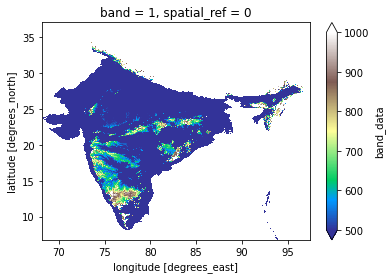

In [8]:
clipped.plot(cmap = 'terrain', vmin = 500, vmax = 1000)

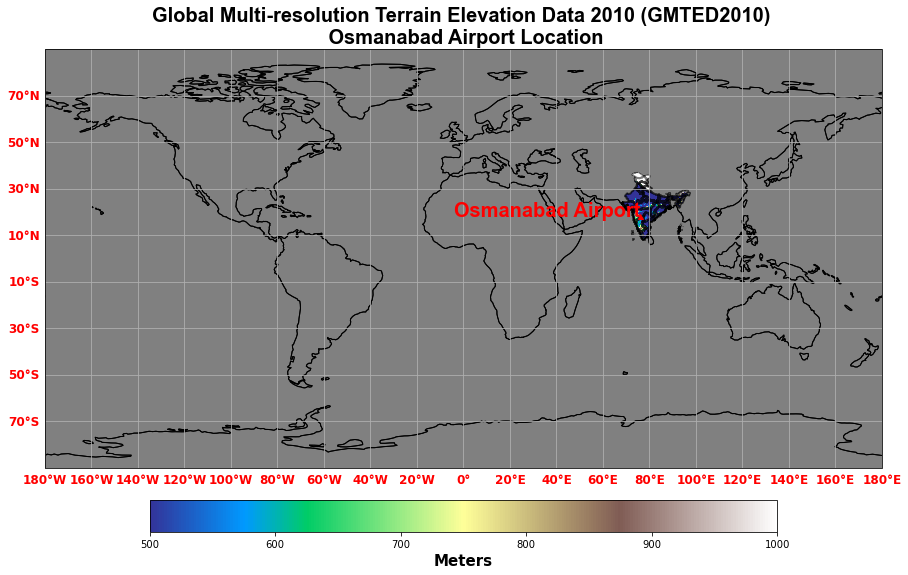

In [14]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())
fname3 = r'F:\Clip-data-from-netCDF-file-and-plot-using-Cartopy-main\Dharashiv.shp'
adm1_shapes3 = list(shpreader.Reader(fname3).geometries())

lon17 = 76.0420
lat17 = 18.1853
def main():
    plt.figure(figsize=(15,12),facecolor = 'none')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 2, facecolor='none') #
    ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
    ax.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.STATES.with_scale('10m'),
#                linestyle='-', alpha=.25, facecolor='none', edgecolor='black')
    
    ax.add_feature(cfeature.COASTLINE)
#     ax.gridlines()
    ax.set_facecolor('grey')
    ax.set_title('Global Multi-resolution Terrain Elevation Data 2010 (GMTED2010) \n Osmanabad Airport Location' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = ax.pcolormesh(clipped.x,clipped.y,clipped[0,:,:],cmap = 'terrain',vmin = 500 , vmax = 1000,
                           transform=ccrs.PlateCarree())
    ax.plot(lon17,lat17,markersize=5,marker='^',color='r')
    plt.text(76.0420,18.4,'Osmanabad Airport',horizontalalignment='right', color= 'red',fontweight="bold", size=20,family= 'Arial')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(-180,200,20))
    gl.ylocator = mticker.FixedLocator(np.arange(-90,90,20))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    a = plt.colorbar(filled_c,ax=ax, orientation='horizontal',pad=0.05,shrink=0.75)
    a.set_label(label='Meters',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})

if __name__ == '__main__':
    main()
# plt.savefig('Whole_elvvation_GMTED2010_3.jpg',bbox_inches='tight',dpi=1080)
plt.show()

## Western Ghats Terrain